# Analysis of experiments with optimal policies

This notebook is used to

In [1]:
import pandas as pd
from ema_workbench import load_results
import os
from dmdu.general.visualization import plot_kpi_pathways, plot_policies_per_problem_formulation, plot_robustness
from dmdu.policydiscovery.robustness import get_robustness_dataframe
from model.enumerations import ProblemFormulation

## Relevant KPI names

In [2]:
names = [
    'Utility',
    'Total Output',
    'Damages',
    'Atmospheric Temperature',
    'Industrial Emission',
    'Temperature overshoot'
]

## Relevant Problem Formulations

In [3]:
problem_formulations = [
    ProblemFormulation.PRIORITARIAN_DISAGGREGATED,
    ProblemFormulation.PRIORITARIAN_AGGREGATED
]

## Loading experimental results

In [4]:
problem_formulations_dict = {}

for problem_formulation in problem_formulations:
    target_directory = os.path.join(os.getcwd(), 'data', f'optimal_policies_{problem_formulation.name}')
    experiments, outcomes = load_results(target_directory)
    outcomes = pd.DataFrame(outcomes)
    problem_formulations_dict[problem_formulation.name] = experiments, outcomes

## Visualization of pathways

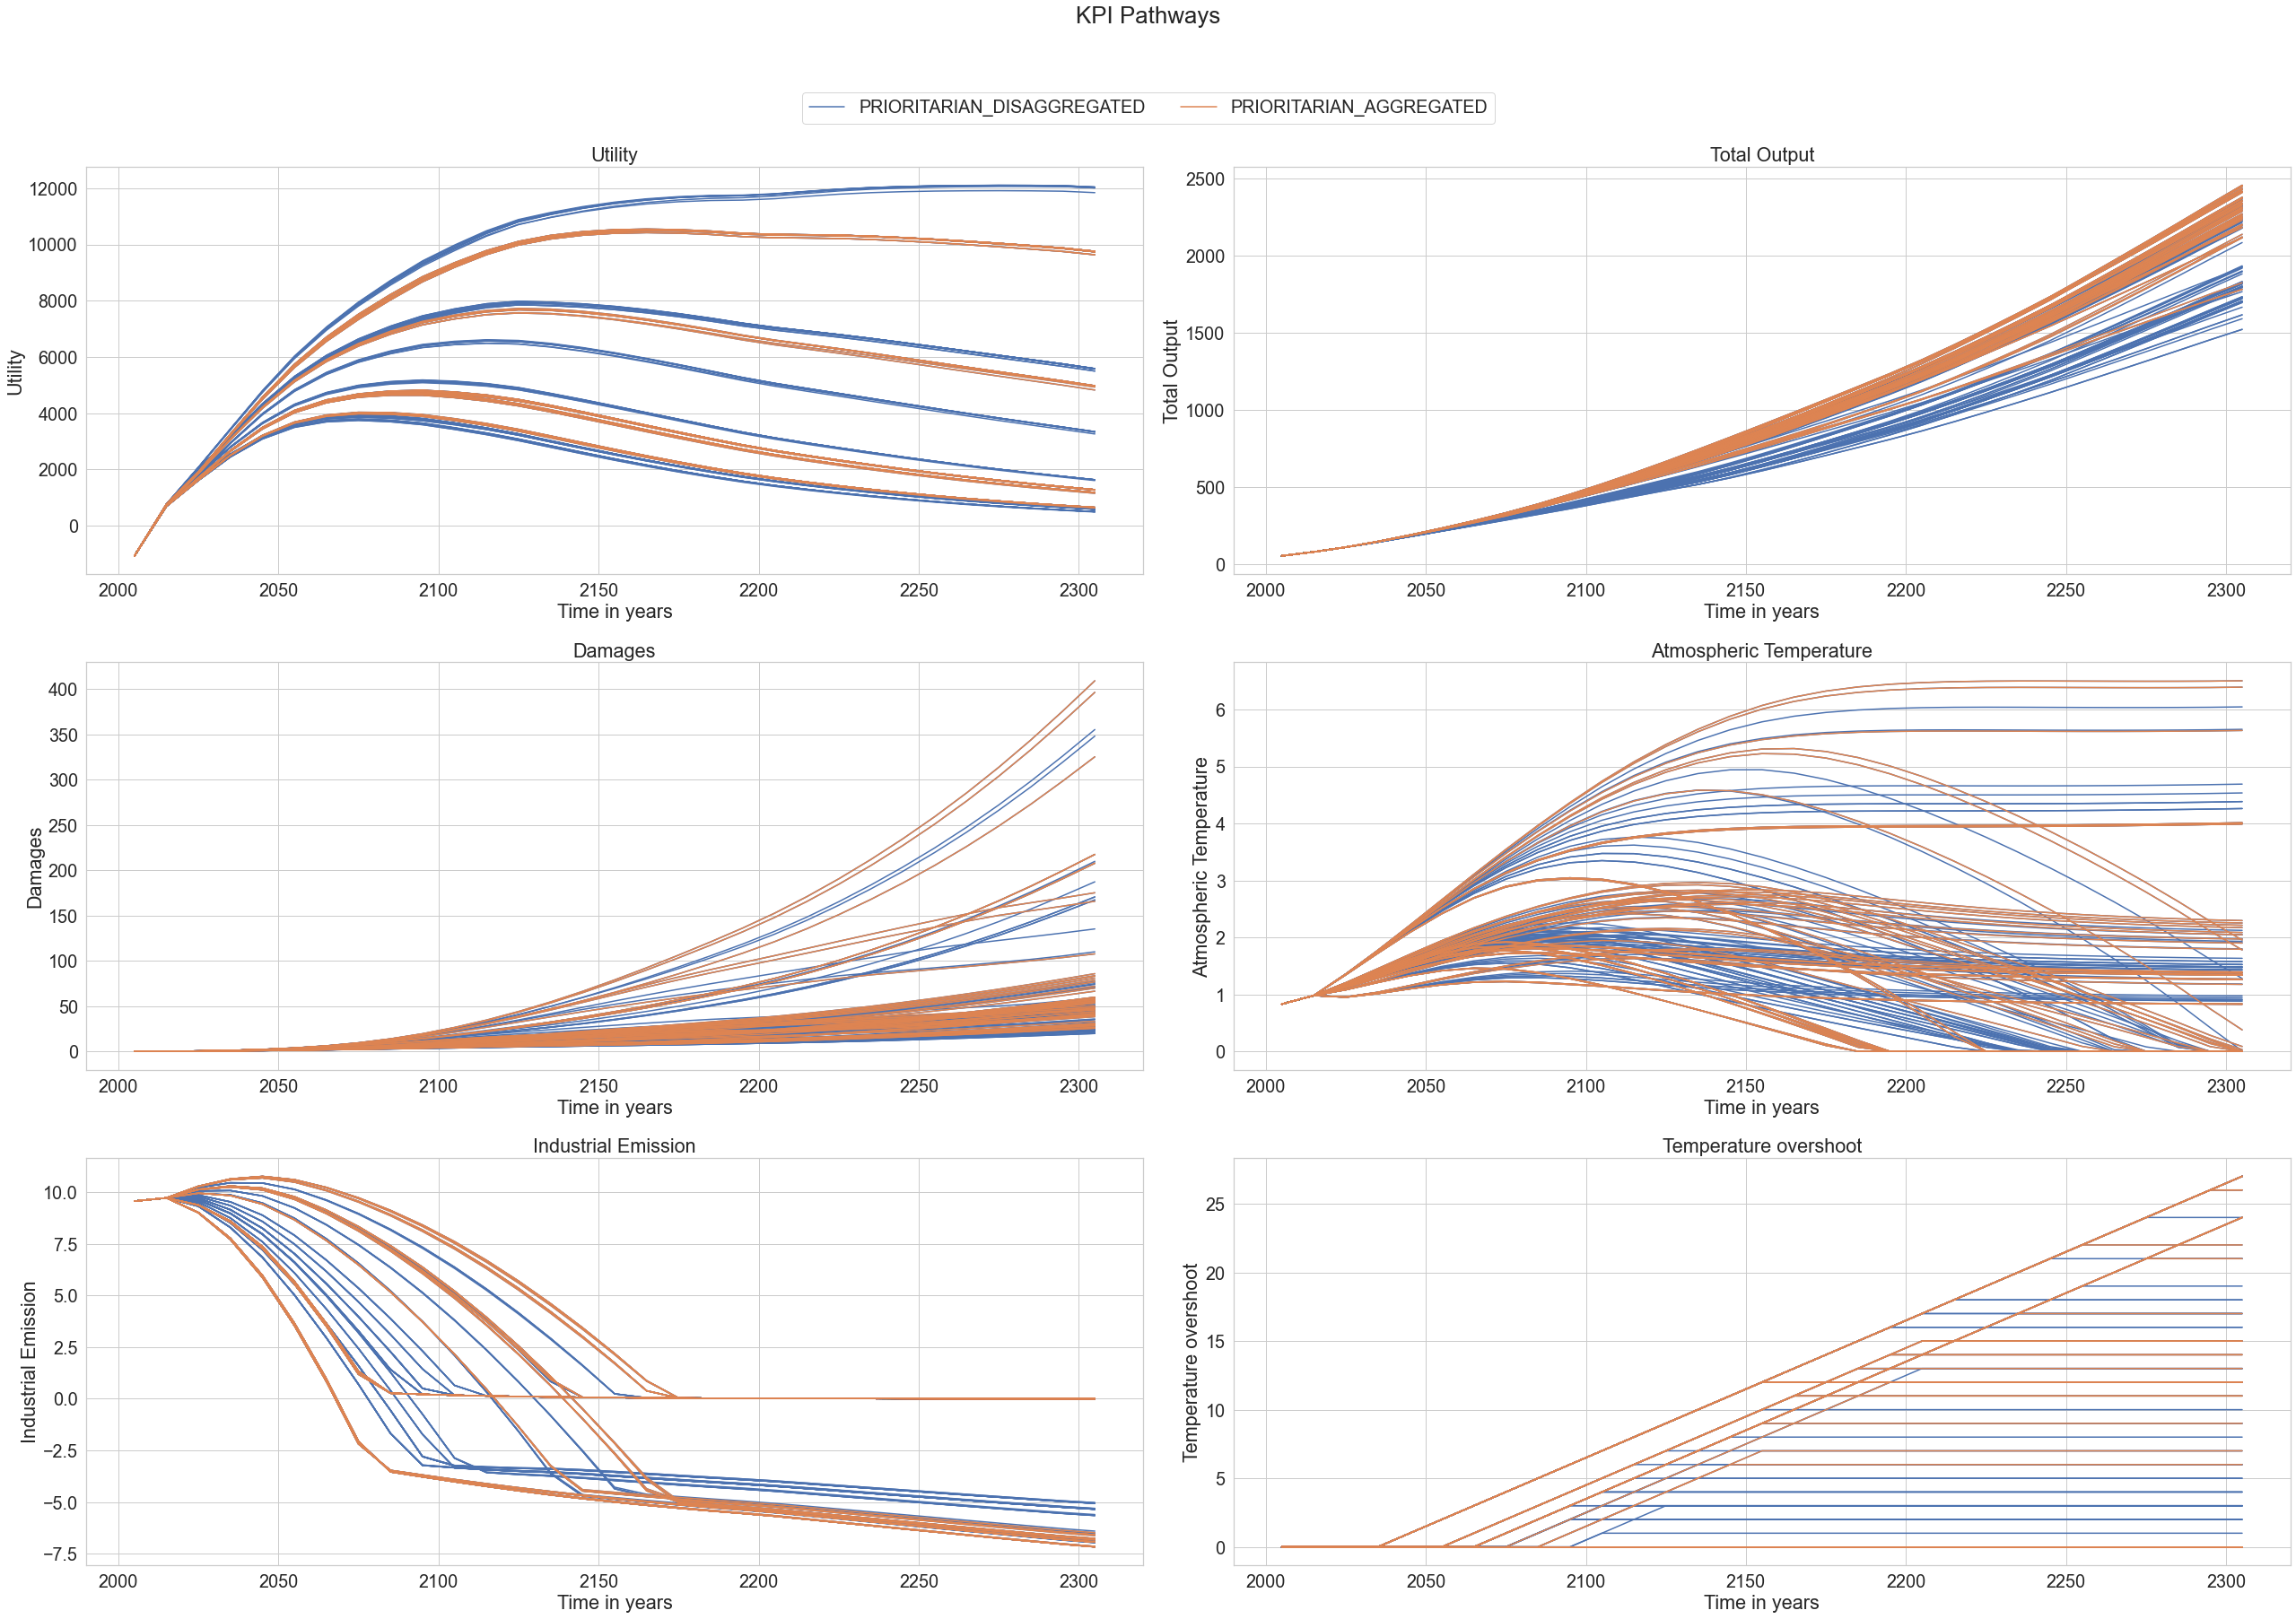

In [5]:
plot_kpi_pathways(problem_formulations_dict, names, saving=True, file_name='KPI_pathways_test')

## Visualization of Pareto-optimal policies

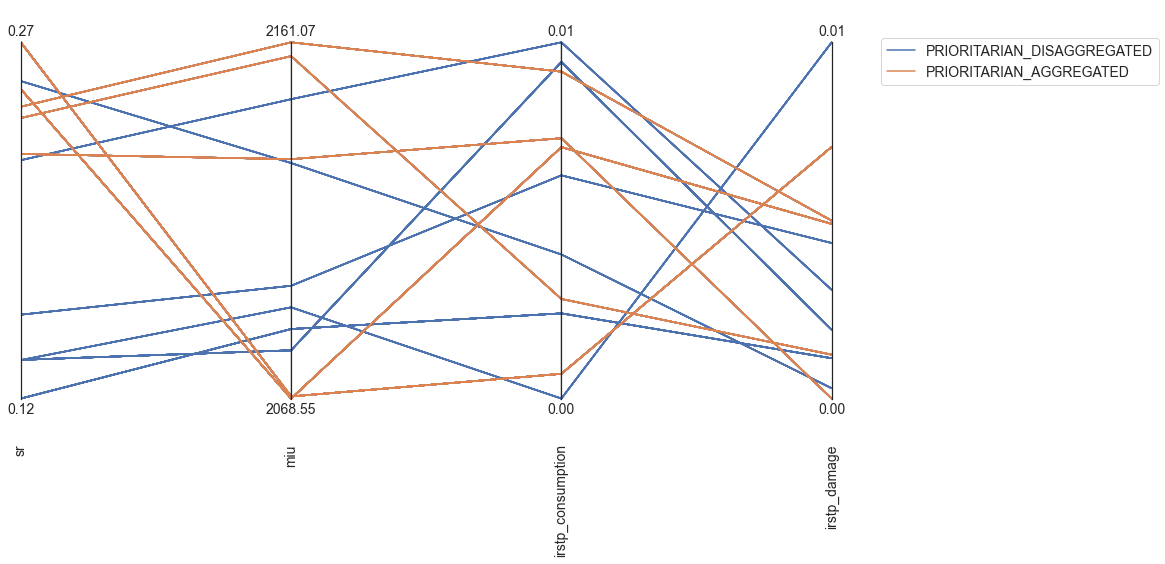

In [6]:
plot_policies_per_problem_formulation(problem_formulations_dict, saving=True, file_name='optimal_policies_test')

## Robustness

In [7]:
robustness_dataframe = None
names = [
    'Utility',
    'Total Output',
    'Damages',
    'Atmospheric Temperature',
    'Industrial Emission',
    'Temperature overshoot'
]
names = [name + ' 2105' for name in names]

for problem_formulation, (experiments, outcomes) in problem_formulations_dict.items():

    outcomes = outcomes.loc[:, names]

    df = get_robustness_dataframe(experiments, outcomes, problem_formulation)
    if robustness_dataframe is None:
        robustness_dataframe = df
    else:
        robustness_dataframe = pd.concat([robustness_dataframe, df])


In [8]:
robustness_dataframe

,Policy,hurwicz(Utility),minimax(Total Output),90minimax(Damages),starr(Atmospheric Temperature),starr(Industrial Emission),starr(Temperature overshoot),Problem Formulation
0,0,4594.773593,77.271421,19.706034,0.8,0.5,0.3,PRIORITARIAN_DISAGGREGATED
1,1,9268.738383,97.319108,13.830973,1.0,1.0,0.8,PRIORITARIAN_DISAGGREGATED
2,2,6497.585923,95.241951,20.766685,0.8,0.5,0.3,PRIORITARIAN_DISAGGREGATED
3,3,3772.751655,91.730363,22.044644,0.8,0.0,0.2,PRIORITARIAN_DISAGGREGATED
4,4,7632.627980,0.000000,12.069880,1.0,1.0,0.7,PRIORITARIAN_DISAGGREGATED
5,5,9268.738383,97.319108,13.830973,1.0,1.0,0.8,PRIORITARIAN_DISAGGREGATED
6,6,9878.624954,12.080650,13.240881,0.9,1.0,0.6,PRIORITARIAN_DISAGGREGATED
7,7,5090.581445,26.596444,14.480369,0.9,1.0,0.5,PRIORITARIAN_DISAGGREGATED
8,8,7632.627980,0.000000,12.069880,1.0,1.0,0.7,PRIORITARIAN_DISAGGREGATED
9,9,4714.797881,85.967854,13.282645,1.0,1.0,0.8,PRIORITARIAN_DISAGGREGATED


## Visualization of robustness

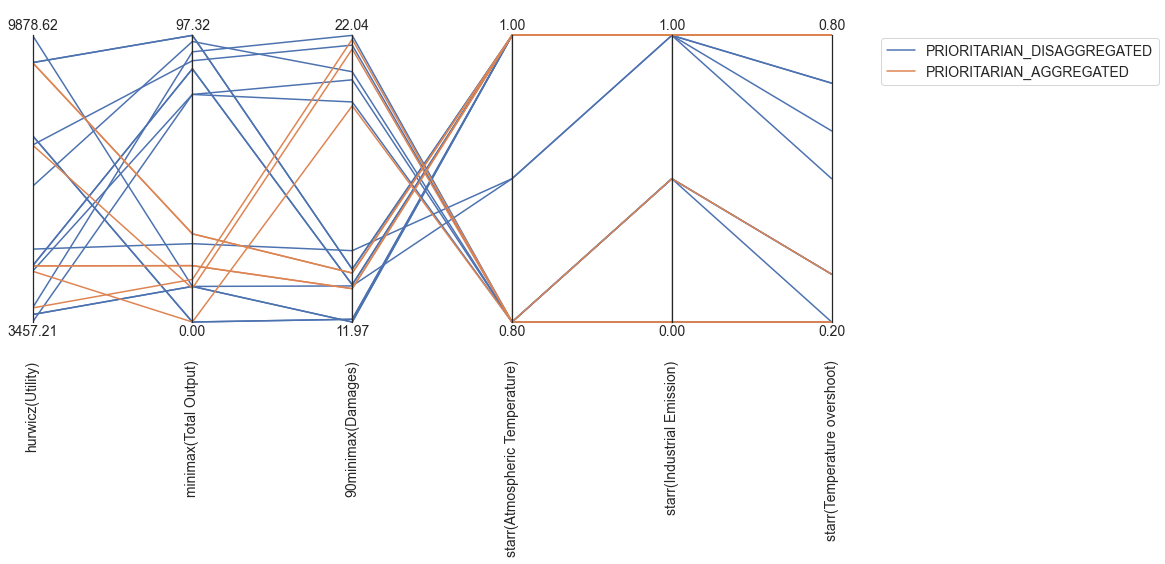

In [9]:
plot_robustness(robustness_dataframe, saving=True, file_name='robustness_test')